In [180]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from datetime import datetime
import pandas as pd 
import time 
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
import sys
sys.path.append("chromedriver.exe")
import matplotlib.pyplot as plt

In [181]:
driver = webdriver.Chrome(executable_path=r"chromedriver.exe")

In [182]:
stocks_gainers='//*[@id="SecondaryNav-0-SecondaryNav-Proxy"]/div/ul/li[5]/a'
stocks_losers='//*[@id="SecondaryNav-0-SecondaryNav-Proxy"]/div/ul/li[6]/a'

In [183]:
# clicking on the losers,gainers
def market_chooser(market_product):
    
    try:
        market_product_type = driver.find_element_by_xpath(market_product)
        market_product_type.click()
    except Exception as e:
        pass

In [184]:
df = pd.DataFrame()
def compile_data():
    global df
    global top_of_the_list
    
    top_of_the_list = driver.find_elements_by_xpath('//*[@id="scr-res-table"]/div[1]/table/tbody/tr[1]/td[2]')
    top_of_the_list_list = [value.text for value in top_of_the_list]

   

    for i in range(len(top_of_the_list_list)):
        try:
            df.loc["Characteristics", i] = top_of_the_list_list[i]
        except Exception as e:
            pass
    print('Excel Sheet Created!')
    
def connect_mail(username, password):
    global server
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()
    server.starttls()
    server.login(username, password)
    
def create_msg():
    global msg
    msg = '\nInformation: {}\n'.format(current_values)    

In [185]:
username = 'hdinh2@uci.edu.com'
password = 'Henry8354392.'

In [186]:
#DATA SCRAPING TOOLS, PLEASE SKIP THIS PART. I SAVE THIS FOR LATER USE. 
for i in range(8):    
    link = 'https://finance.yahoo.com/'
    driver.get(link)
    #wait for the page to load
    time.sleep(10)

    markets_button_yfinance = driver.find_element_by_xpath('//*[@id="Nav-0-DesktopNav"]/div/div[3]/div/div[1]/ul/li[4]/a')
    markets_button_yfinance.click()
    market_chooser(stocks_gainers)
    
    
    compile_data()
    
    #save values for email
    current_values = df.iloc[0]
    
    print('Number of iterations: {}'.format(i))
    create_msg()
    connect_mail(username,password)
    send_email(msg)
    print('Email sent')
    
    df.to_excel('best_worst_stock.xlsx')
    
    time.sleep(60)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=73.0.3683.103)
  (Driver info: chromedriver=2.34.522940 (1a76f96f66e3ca7b8e57d503b4dd3bccfba87af1),platform=Windows NT 10.0.17134 x86_64)


In [187]:
#START HERE!
#Import and read the data. 
all_stocks = pd.read_csv('all_stocks_5yr.csv')


In [188]:
#List of all Publicly Traded Companies within our Dataset
all_stocks['Name'].value_counts()

AMGN    1259
TXN     1259
RF      1259
SYY     1259
PNC     1259
HRL     1259
VRTX    1259
CTAS    1259
AME     1259
EMN     1259
CHTR    1259
GM      1259
CVX     1259
GGP     1259
RSG     1259
PBCT    1259
MET     1259
CBOE    1259
EL      1259
DVN     1259
MCK     1259
LUK     1259
TXT     1259
NRG     1259
ED      1259
HST     1259
ATVI    1259
CPB     1259
JPM     1259
NI      1259
        ... 
DHR     1243
IQV     1197
COTY    1173
NWSA    1169
FOX     1169
NWS     1169
FOXA    1169
ALLE    1063
GOOG     975
NAVI     960
INFO     917
SYF      888
CFG      850
QRVO     781
WRK      662
KHC      655
PYPL     655
HPE      581
HPQ      581
CSRA     561
WLTW     528
UA       464
FTV      404
EVHC     297
HLT      276
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [198]:
#Sort the data by FedEx only 
FedEx = all_stocks.loc[all_stocks['Name'] == 'FDX']
FedEx = FedEx.reset_index()
FedEx.head()

,index,date,open,high,low,close,volume,Name
0,221127,2013-02-08,106.80,107.50,106.23,106.41,2101805,FDX
1,221128,2013-02-11,106.01,106.37,105.48,106.01,1746041,FDX
2,221129,2013-02-12,106.09,106.48,105.58,106.12,2044439,FDX
3,221130,2013-02-13,106.12,106.64,105.56,106.16,1740007,FDX
4,221131,2013-02-14,105.85,106.86,105.44,106.56,1660557,FDX


In [199]:
#Starting date and ending date respectively (Range)
print(FedEx['date'].iloc[0],'to' ,FedEx['date'].iloc[-1])

2013-02-08 to 2018-02-07


In [203]:
#Convert String to datetime to plot a Time Series
FedEx['date'] = pd.to_datetime(FedEx['date'])

In [207]:
#Styles and Font function
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

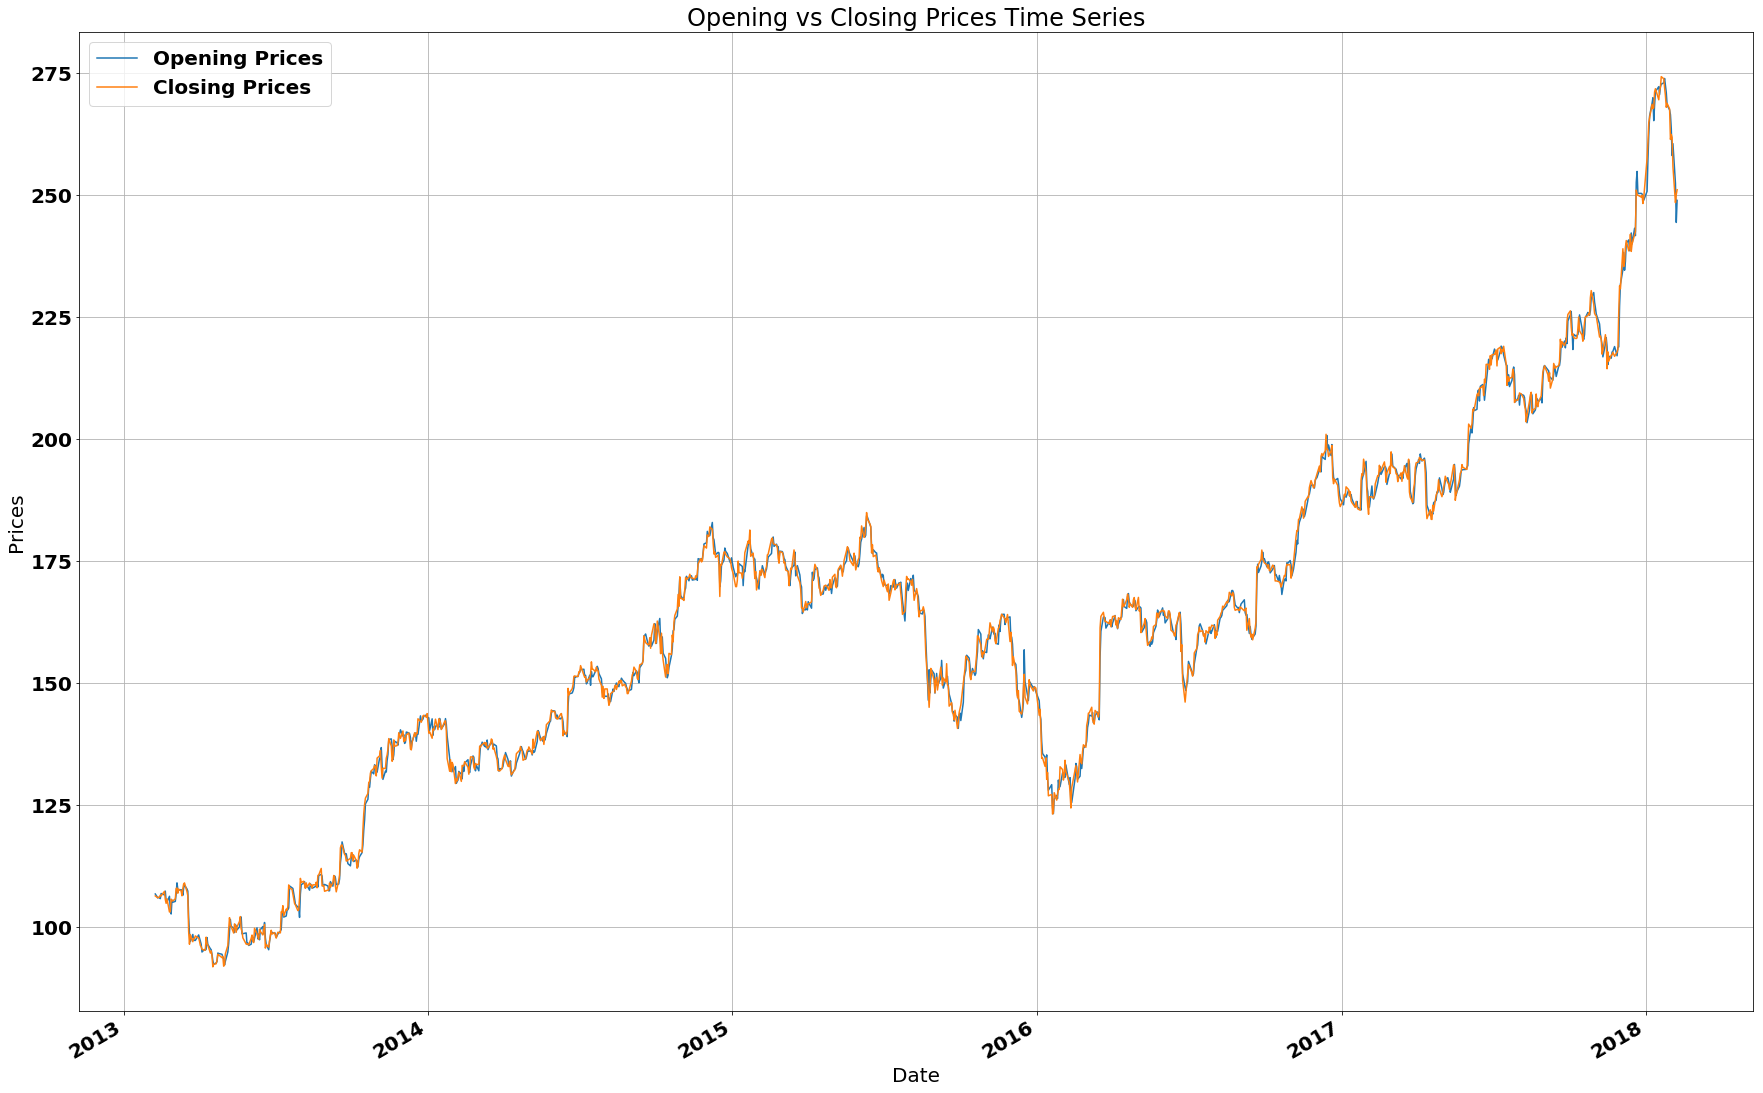

In [204]:
#Plot the Time Series for FedEx dataset with Opening and Closing Prices as our variables of interest. 
#FedEx['date'] = pd.Series(list(range(len(FedEx))))
ax = FedEx.plot(x = 'date',y= 'open', label = "Opening Prices")
FedEx.plot(x='date', y='close', label = 'Closing Prices', ax = ax, figsize= (30,20), title = 'Opening vs Closing Prices Time Series')

#Format: 
plt.grid()
plt.rc('font', **font)
plt.xlabel('Date')
plt.ylabel("Prices")
plt.show()


In [208]:
#We now take a look at the stock prices before the merger was announce. To do that, we create 2 subsets 
#FDX_b4_merg and FDX_after_merg 
FedEx.loc[FedEx['date'] == '2015-04-27 00:00:00']
FDX_b4_merg = FedEx.iloc[0:556, :]
FDX_after_merg = FedEx.iloc[557:-1, :]
FDX_after_merg.head()

,index,date,open,high,low,close,volume,Name
557,221684,2015-04-28,169.27,171.96,168.51,171.24,1522218,FDX
558,221685,2015-04-29,169.84,170.94,168.72,169.57,1115325,FDX
559,221686,2015-04-30,168.39,169.95,168.36,169.57,1818816,FDX
560,221687,2015-05-01,170.00,171.93,169.93,171.73,1164647,FDX
561,221688,2015-05-04,171.61,173.48,171.51,172.33,1041388,FDX


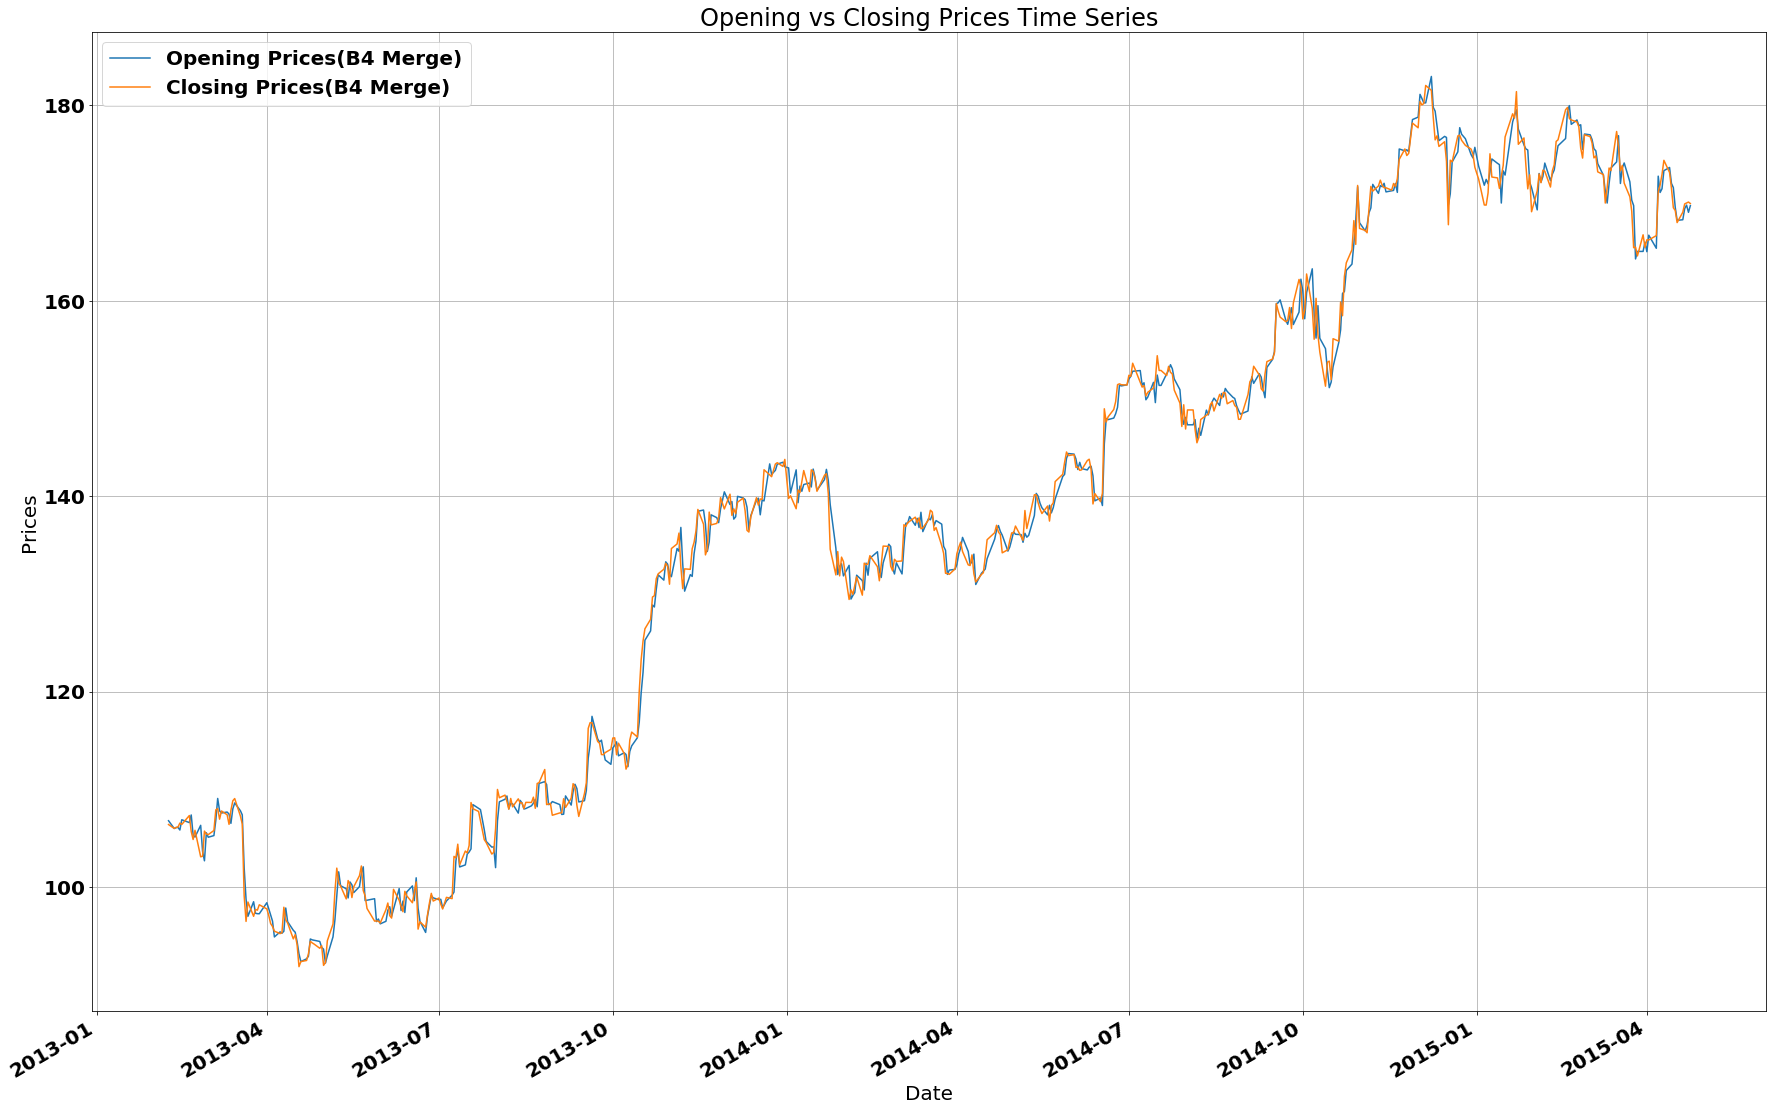

In [209]:
#Create a Time Series for FDX_b4_mer Dataset.
ax = FDX_b4_merg.plot(x = 'date',y= 'open', label = "Opening Prices(B4 Merge)")
FDX_b4_merg.plot(x = 'date',y= 'close', label = "Closing Prices(B4 Merge)", ax = ax,  figsize= (30,20), title = 'Opening vs Closing Prices Time Series')



#Format: 
plt.grid()
plt.xlabel('Date')
plt.ylabel("Prices")
plt.rc('font', **font)
plt.show()


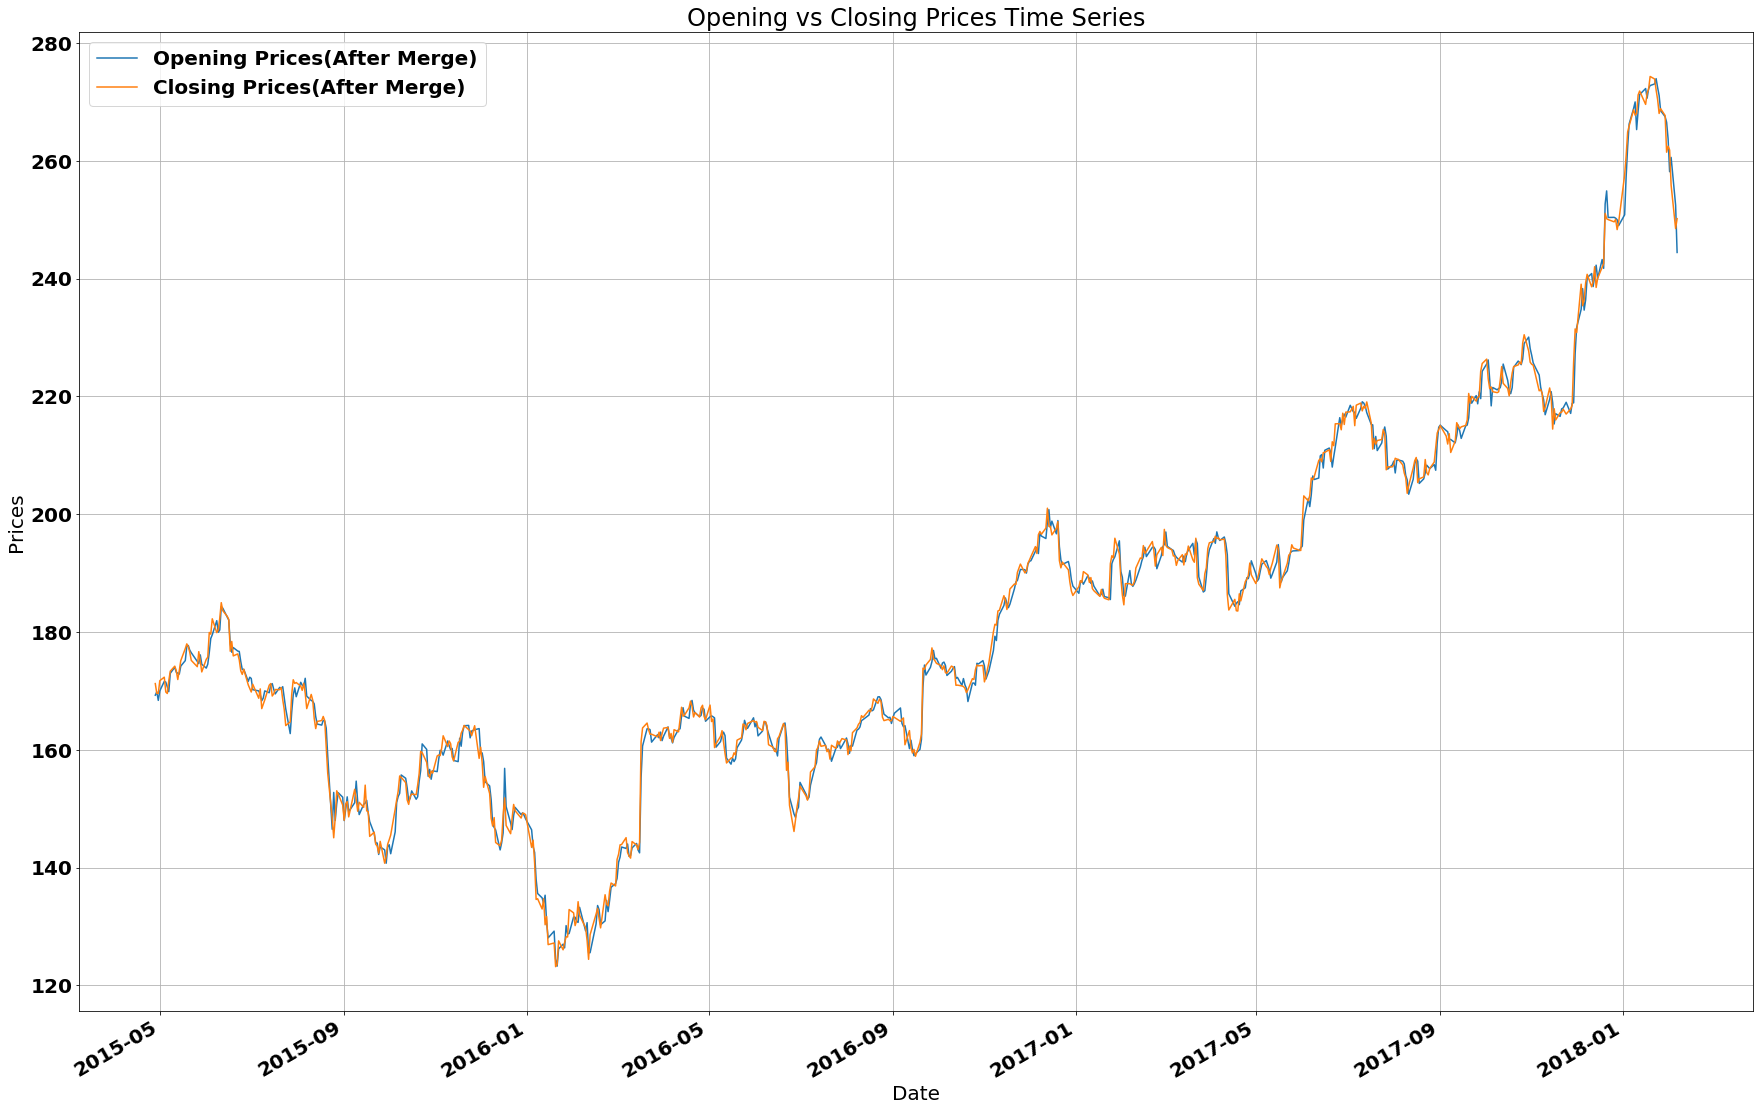

In [153]:
#Create a Time Series for FDX_after_mer Dataset.
ax = FDX_after_merg.plot(x = 'date',y= 'open', label = "Opening Prices(After Merge)")
FDX_after_merg.plot(x='date', y='close', label = 'Closing Prices(After Merge)', ax = ax, figsize= (30,20), title = 'Opening vs Closing Prices Time Series')

#Format: 
plt.grid()
plt.rc('font', **font)
plt.xlabel('Date')
plt.ylabel("Prices")
plt.show()

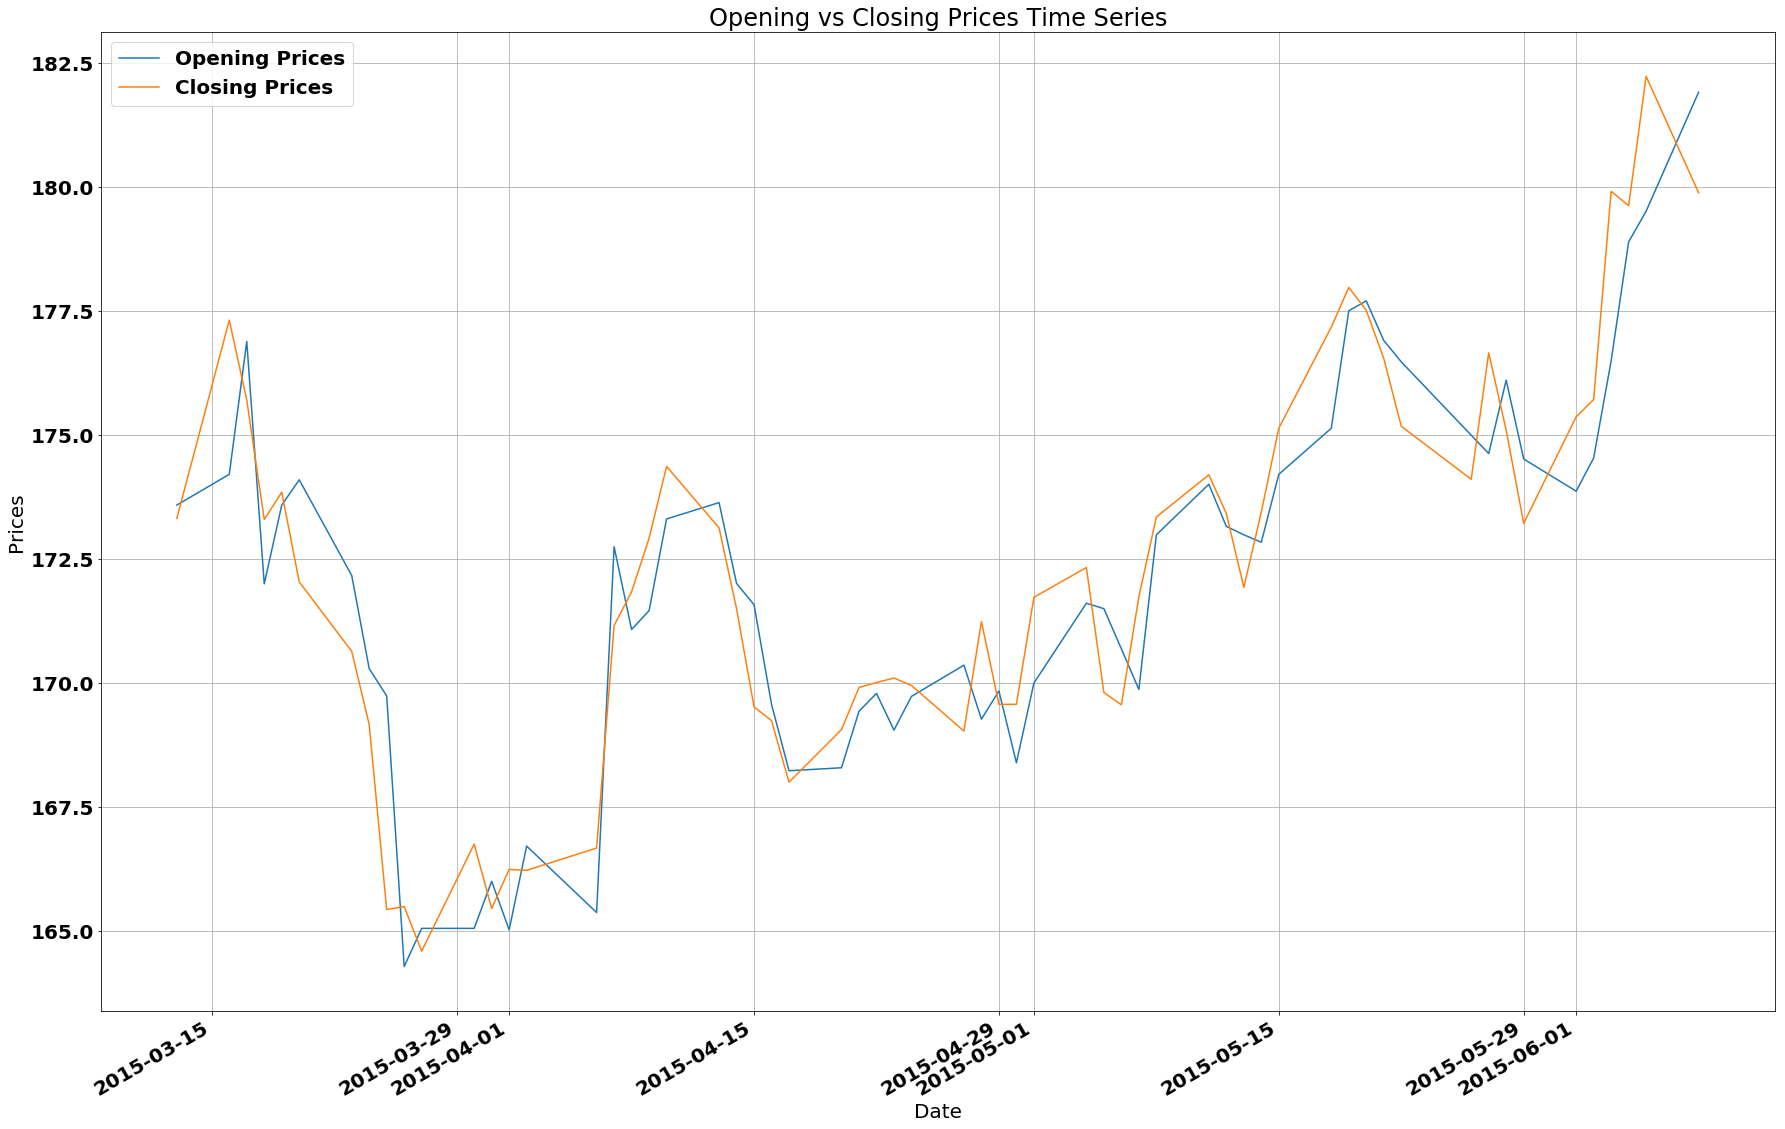

In [210]:
#To take a closer look, we look at the data 1 month prior to the merger announce date and 1 month after the merger was 
#announced
short_run_df = FedEx.iloc[526:586, :]
ax = short_run_df.plot(x = 'date',y= 'open', label = "Opening Prices")
short_run_df.plot(x='date', y='close', label = 'Closing Prices', ax = ax, figsize= (30,20), title = 'Opening vs Closing Prices Time Series')

#Format: 
plt.grid()
plt.rc('font', **font)
plt.xlabel('Date')
plt.ylabel("Prices")
plt.show()

In [112]:
#Export to csv file 
FedEx.to_csv('FDX.csv', index = False)

pandas.core.series.Series